# Logistic Regression with Python TensorFlow

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

1.3.0


## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

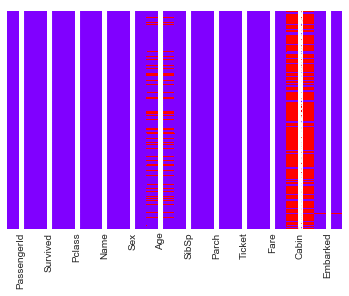

In [8]:
sns.set_style('whitegrid')
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='rainbow',annot=True)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

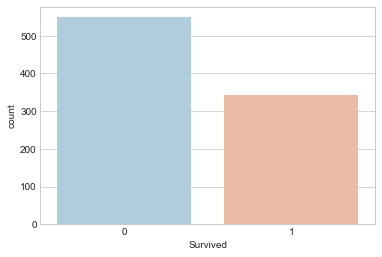

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

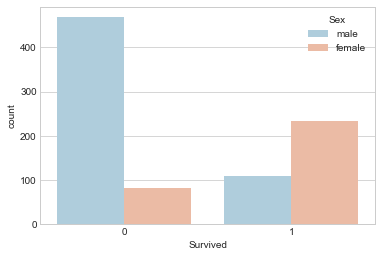

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

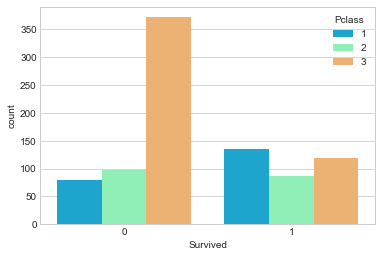

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

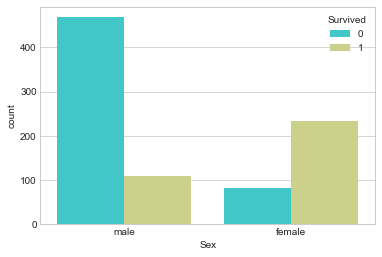

In [12]:
sns.countplot (x='Sex',data=train,hue='Survived',palette='rainbow')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


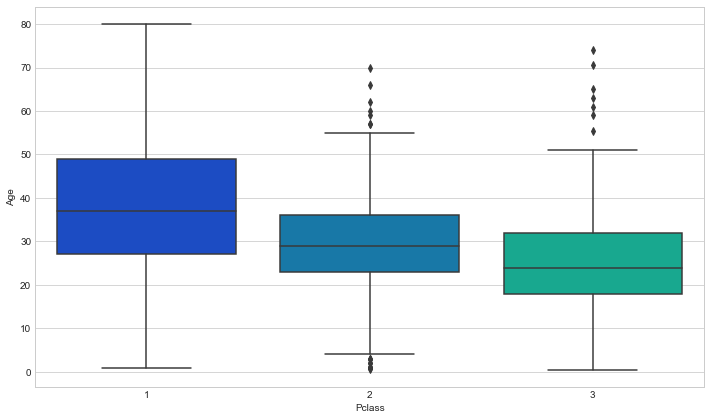

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
train['Sex'].nunique()

2

Now apply that function!

In [16]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [17]:
sex_norm = {'Male':1,'female':0}
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [19]:
train['Sex'].map(sex_norm).head()

0    NaN
1    0.0
2    0.0
3    0.0
4    NaN
Name: Sex, dtype: float64

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

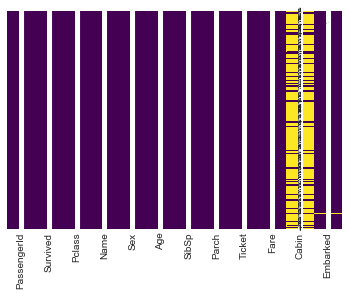

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',annot=True)

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [22]:
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
train['Embarked'].nunique()

3

In [28]:

for i in range(train['Embarked'].nunique()):
    print(i, train['Embarked'].unique()[i])
        

0 S
1 C
2 Q


In [29]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S


In [38]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [62]:
#various continuous features
PassengerId = tf.feature_column.numeric_column('PassengerId')
Pclass = tf.feature_column.numeric_column('Pclass')
Age = tf.feature_column.numeric_column('Age')
SibSp = tf.feature_column.numeric_column('SibSp')
Parch = tf.feature_column.numeric_column('Parch')
Fare = tf.feature_column.numeric_column('Fare')
male = tf.feature_column.numeric_column('male')
Q = tf.feature_column.numeric_column('Q')
S = tf.feature_column.numeric_column('S')


In [63]:
#list of all featured columns
feat_cols = [PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S]
      

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = train.drop('Survived',axis=1)
#label
labels = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,labels, test_size=0.30,random_state=101)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 807 to 865
Data columns (total 9 columns):
PassengerId    622 non-null int64
Pclass         622 non-null int64
Age            622 non-null float64
SibSp          622 non-null int64
Parch          622 non-null int64
Fare           622 non-null float64
male           622 non-null uint8
Q              622 non-null uint8
S              622 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 35.8 KB


In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 511 to 634
Data columns (total 9 columns):
PassengerId    267 non-null int64
Pclass         267 non-null int64
Age            267 non-null float64
SibSp          267 non-null int64
Parch          267 non-null int64
Fare           267 non-null float64
male           267 non-null uint8
Q              267 non-null uint8
S              267 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 15.4 KB


## Training and Predicting

In [69]:
#create input function for estimator object
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [70]:
feat_cols

[_NumericColumn(key='PassengerId', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='male', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Q', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='S', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [71]:
#create a model
model = tf.estimator.LinearClassifier(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\INTEL\\AppData\\Local\\Temp\\tmp_5yeozwf', '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_tf_random_seed': 1}


In [72]:
# train the model
model.train(input_fn = input_func,steps=100000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\INTEL\AppData\Local\Temp\tmp_5yeozwf\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 304.788
INFO:tensorflow:step = 101, loss = 27.9082 (0.344 sec)
INFO:tensorflow:global_step/sec: 355.533
INFO:tensorflow:step = 201, loss = 5.27221 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.855
INFO:tensorflow:step = 301, loss = 4.62335 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.821
INFO:tensorflow:step = 401, loss = 23.9653 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.856
INFO:tensorflow:step = 501, loss = 5.41039 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:step = 601, loss = 2.39493 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.838
INFO:tensorflow:step = 701, loss = 18.3196 (0.313 sec)
INFO:tensorflow:global_step/sec: 304.758
INFO:tensorflow:step = 801, loss = 8.85933 (0.312 sec)
INFO:tensorflow:global_step/sec: 355.553
IN

INFO:tensorflow:global_step/sec: 319.997
INFO:tensorflow:step = 8401, loss = 5.66189 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.549
INFO:tensorflow:step = 8501, loss = 2.80822 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.822
INFO:tensorflow:step = 8601, loss = 5.95537 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.856
INFO:tensorflow:step = 8701, loss = 3.40289 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.838
INFO:tensorflow:step = 8801, loss = 4.7519 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.533
INFO:tensorflow:step = 8901, loss = 1.84303 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.567
INFO:tensorflow:step = 9001, loss = 1.52475 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.824
INFO:tensorflow:step = 9101, loss = 7.18211 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.856
INFO:tensorflow:step = 9201, loss = 6.55319 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.531
INFO:tensorflow:step = 9301, loss = 4.6118 (0.281 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 355.571
INFO:tensorflow:step = 16801, loss = 6.12279 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.837
INFO:tensorflow:step = 16901, loss = 5.11348 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.552
INFO:tensorflow:step = 17001, loss = 3.72515 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.552
INFO:tensorflow:step = 17101, loss = 2.89129 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.821
INFO:tensorflow:step = 17201, loss = 2.55936 (0.297 sec)
INFO:tensorflow:global_step/sec: 376.484
INFO:tensorflow:step = 17301, loss = 1.51839 (0.250 sec)
INFO:tensorflow:global_step/sec: 336.823
INFO:tensorflow:step = 17401, loss = 6.29182 (0.313 sec)
INFO:tensorflow:global_step/sec: 376.485
INFO:tensorflow:step = 17501, loss = 2.11666 (0.266 sec)
INFO:tensorflow:global_step/sec: 336.837
INFO:tensorflow:step = 17601, loss = 7.41291 (0.297 sec)
INFO:tensorflow:global_step/sec: 376.47
INFO:tensorflow:step = 17701, loss = 7.08124 (0.266 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 355.535
INFO:tensorflow:step = 25201, loss = 9.90742 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.852
INFO:tensorflow:step = 25301, loss = 6.44646 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.825
INFO:tensorflow:step = 25401, loss = 6.45496 (0.281 sec)
INFO:tensorflow:global_step/sec: 320.012
INFO:tensorflow:step = 25501, loss = 5.51173 (0.328 sec)
INFO:tensorflow:global_step/sec: 336.838
INFO:tensorflow:step = 25601, loss = 3.5657 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.548
INFO:tensorflow:step = 25701, loss = 5.27814 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.842
INFO:tensorflow:step = 25801, loss = 4.1879 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.835
INFO:tensorflow:step = 25901, loss = 2.34638 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.555
INFO:tensorflow:step = 26001, loss = 6.51253 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.531
INFO:tensorflow:step = 26101, loss = 12.6237 (0.281 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:step = 33601, loss = 2.12231 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:step = 33701, loss = 7.85987 (0.266 sec)
INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:step = 33801, loss = 5.88582 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.568
INFO:tensorflow:step = 33901, loss = 4.21268 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.824
INFO:tensorflow:step = 34001, loss = 3.4967 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.568
INFO:tensorflow:step = 34101, loss = 3.67778 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.554
INFO:tensorflow:step = 34201, loss = 4.97575 (0.266 sec)
INFO:tensorflow:global_step/sec: 355.55
INFO:tensorflow:step = 34301, loss = 8.50508 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.55
INFO:tensorflow:step = 34401, loss = 7.82998 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.841
INFO:tensorflow:step = 34501, loss = 7.70708 (0.281 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 336.839
INFO:tensorflow:step = 42001, loss = 4.17466 (0.313 sec)
INFO:tensorflow:global_step/sec: 336.855
INFO:tensorflow:step = 42101, loss = 5.82108 (0.281 sec)
INFO:tensorflow:global_step/sec: 304.759
INFO:tensorflow:step = 42201, loss = 4.82993 (0.344 sec)
INFO:tensorflow:global_step/sec: 278.256
INFO:tensorflow:step = 42301, loss = 6.86989 (0.344 sec)
INFO:tensorflow:global_step/sec: 336.841
INFO:tensorflow:step = 42401, loss = 4.37138 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.547
INFO:tensorflow:step = 42501, loss = 5.65081 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.842
INFO:tensorflow:step = 42601, loss = 3.02483 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.835
INFO:tensorflow:step = 42701, loss = 8.19124 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.84
INFO:tensorflow:step = 42801, loss = 4.30872 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.548
INFO:tensorflow:step = 42901, loss = 1.64038 (0.281 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 355.569
INFO:tensorflow:step = 50401, loss = 5.88521 (0.281 sec)
INFO:tensorflow:global_step/sec: 326.501
INFO:tensorflow:step = 50501, loss = 5.898 (0.291 sec)
INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:step = 50601, loss = 4.73685 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.552
INFO:tensorflow:step = 50701, loss = 2.57691 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:step = 50801, loss = 2.2427 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.532
INFO:tensorflow:step = 50901, loss = 3.10288 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.855
INFO:tensorflow:step = 51001, loss = 4.04626 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.552
INFO:tensorflow:step = 51101, loss = 3.85102 (0.281 sec)
INFO:tensorflow:global_step/sec: 336.838
INFO:tensorflow:step = 51201, loss = 7.18866 (0.313 sec)
INFO:tensorflow:global_step/sec: 355.548
INFO:tensorflow:step = 51301, loss = 2.13844 (0.281 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 336.841
INFO:tensorflow:step = 58801, loss = 5.32371 (0.313 sec)
INFO:tensorflow:global_step/sec: 355.533
INFO:tensorflow:step = 58901, loss = 3.21696 (0.281 sec)
INFO:tensorflow:global_step/sec: 376.466
INFO:tensorflow:step = 59001, loss = 6.83084 (0.266 sec)
INFO:tensorflow:global_step/sec: 355.572
INFO:tensorflow:step = 59101, loss = 4.2533 (0.281 sec)
INFO:tensorflow:global_step/sec: 376.462
INFO:tensorflow:step = 59201, loss = 2.31795 (0.266 sec)
INFO:tensorflow:global_step/sec: 336.841
INFO:tensorflow:step = 59301, loss = 2.65933 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.532
INFO:tensorflow:step = 59401, loss = 5.21304 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.854
INFO:tensorflow:step = 59501, loss = 5.62849 (0.281 sec)
INFO:tensorflow:global_step/sec: 354.479
INFO:tensorflow:step = 59601, loss = 5.60597 (0.282 sec)
INFO:tensorflow:global_step/sec: 355.553
INFO:tensorflow:step = 59701, loss = 6.02669 (0.281 sec)
INFO:tensorflow:globa

In [73]:
#evaluate the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [74]:
#results
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-06-02-16:48:42
INFO:tensorflow:Restoring parameters from C:\Users\INTEL\AppData\Local\Temp\tmp_5yeozwf\model.ckpt-62200
INFO:tensorflow:Finished evaluation at 2018-06-02-16:48:44
INFO:tensorflow:Saving dict for global step 62200: accuracy = 0.820225, accuracy_baseline = 0.610487, auc = 0.864323, auc_precision_recall = 0.852181, average_loss = 0.439196, global_step = 62200, label/mean = 0.389513, loss = 4.34316, prediction/mean = 0.335668


In [75]:
#predictions
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [76]:
predictions = model.predict(pred_input_func)

In [77]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\INTEL\AppData\Local\Temp\tmp_5yeozwf\model.ckpt-62200


In [78]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.10675982], dtype=float32),
  'logits': array([-2.12427378], dtype=float32),
  'probabilities': array([ 0.89324021,  0.10675983], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.12571004], dtype=float32),
  'logits': array([-1.93943405], dtype=float32),
  'probabilities': array([ 0.87428999,  0.12571004], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.74038213], dtype=float32),
  'logits': array([ 1.04795551], dtype=float32),
  'probabilities': array([ 0.25961789,  0.74038213], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.88816893], dtype=float32),
  'logits': array([ 2.07217264], dtype=float32),
  'probabilities': array([ 0.11183105,  0.88816893], dtype=flo

In [79]:
y_pred = [pred['class_ids'][0] for pred in my_pred]

In [81]:
len(y_pred)

267

In [82]:
y_test.shape

(267,)

In [83]:
df_pred = pd.DataFrame({'True_Values':y_test,'Predicted_Values':y_pred})

In [85]:
df_pred.head()

,Predicted_Values,True_Values
511,0,0
613,0,0
615,1,1
337,1,1
718,0,0


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [86]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [87]:
print(accuracy_score(y_test,y_pred))

0.820224719101


In [89]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [90]:
print(confusion_matrix(y_test,y_pred))

[[151  12]
 [ 36  68]]


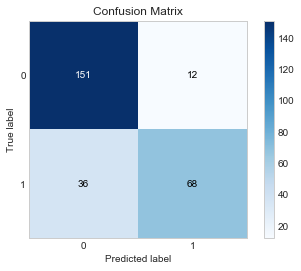

In [94]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)